In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict, deque
from plot_utils import *
env_exp_dir = Path.cwd()/env_name/'distributed'

In [ ]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
actors_dict = defaultdict(lambda: defaultdict(list)) #experiment_dict: learning_step_dict: list
for exp in experiment_list:
    current_exp_dir = env_exp_dir/exp
    runs = (runs_dir(current_exp_dir))
    runs.sort()
    for run in runs:
        current_run_dir = current_exp_dir/run
        actors_csvs = actors_dir(current_run_dir)
        actors_csvs.sort()
        for actor_csv in actors_csvs:
            df =pd.read_csv(current_run_dir/actor_csv, index_col = 0)
            for index, row in df.iterrows():
                actors_dict[exp][index].append(row['avg_steps_ep'])

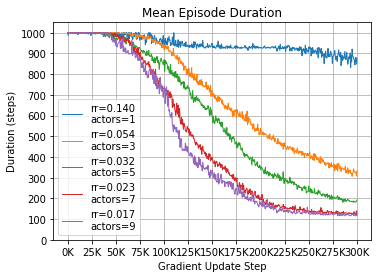

In [3]:
x_ticks = np.arange(0, 300001, step = 25000)
y_ticks = np.arange(0, 1001, step = 100)

fig = create_std_fig('Mean Episode Duration', 'Gradient Update Step', 'Duration (steps)', x_ticks, y_ticks)
plt.xticks(x_ticks, ['{:.0f}'.format(x) + 'K' for x in x_ticks/1000])
axes = plt.gca()
axes.set_ylim(bottom=0, top = 1050)

# plt.axhline(y=0, color='k', linestyle='-')
# plt.axhline(y=1, color='g', linestyle='-')

for exp, lbl in zip(experiment_list, labels):
    learning_steps = []
    duration = []
    for learning_step, learning_step_values in actors_dict[exp].items():
        if learning_step >= int(300.5e3):
            break
        learning_steps.append(learning_step)
        duration.append(np.mean(learning_step_values))

    duration = [mean_duration for ls,mean_duration in sorted(zip(learning_steps,duration))]
    learning_steps.sort()

    plt.plot(learning_steps, duration, label = lbl, linewidth = 1)

plt.legend()
plt.savefig("mean_episode_duration.pgf")